In [1]:
import pymssql
import pandas as pd
import numpy as np
import os
import re
import joblib
import sys 
import DSI_Capstone_Steemit
from DSI_Capstone_Steemit.utils.utils import(
    load_data_and_description,
    load_raw_cleaned
)
import networkx as nx
# load_data_and_description(data_type = 'tfidf')
data_directory = '../data/'

%matplotlib inline

import seaborn as sns
import community
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
import community_louvain as community
input_directory = os.path.join(data_directory,'networkx_votes')

def load_joblib(filename):
    return joblib.load(os.path.join(input_directory,filename))

In [2]:
authors = pd.read_csv(os.path.join(data_directory,'accounts.csv'))

In [3]:
raw_posts = load_raw_cleaned()



/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (62) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [4]:
raw_posts = raw_posts[raw_posts['depth'] == 0]

In [5]:
hubs,authorities = load_joblib('hits')
cluster = load_joblib('parts')
pagerank = load_joblib('prank') 
eig_cent = load_joblib('eig_cent') 
core_k = load_joblib('core_k') 




In [6]:


raw_posts['Cluster'] = raw_posts['author'].map(cluster)
raw_posts.loc[:,'Cluster Condense'] = raw_posts['Cluster']
raw_posts.loc[~raw_posts['Cluster'].isin([1,3,0,2,5,4]),'Cluster Condense'] = 'Other'
raw_posts['Hubs'] = raw_posts['author'].map(hubs) * 10000
raw_posts['Authorities'] = raw_posts['author'].map(authorities) * 10000
raw_posts['Page Rank'] = raw_posts['author'].map(pagerank) * 10000
raw_posts['Eigen Centrality'] = raw_posts['author'].map(eig_cent)* 10000
raw_posts['Core K'] = raw_posts['author'].map(core_k)*10000


authors['Hubs'] = authors['name'].map(hubs) * 10000
authors['Authorities'] = authors['name'].map(authorities) * 10000
authors['Cluster'] = authors['name'].map(cluster)
authors.loc[:,'Cluster Condense'] = authors['Cluster']
authors.loc[~authors['Cluster'].isin([1,3,0,2,5,4]),'Cluster Condense'] = 'Other'


authors['Page Rank'] = authors['name'].map(pagerank) * 10000
authors['Eigen Centrality'] = authors['name'].map(eig_cent)* 10000
authors['Core K'] = authors['name'].map(core_k)*10000

In [7]:
posts_author_mean = raw_posts.groupby('author').mean()
posts_author_sum = raw_posts.groupby('author').sum()





posts_cluster_mean = raw_posts.groupby(['Cluster Condense']).mean().ix[:,['total_payout_value']].reset_index()
posts_cluster_mean.columns = ['Cluster','Mean Payout Value']
posts_cluster_sum = raw_posts.groupby(['Cluster Condense']).sum().ix[:,['total_payout_value']].reset_index()
posts_cluster_sum.columns = ['Cluster','Summed Payout Value']

posts_cluster_author_mean = authors.groupby(['Cluster Condense']).mean().ix[:,['reputation']].reset_index()
posts_cluster_author_mean.columns = ['Cluster','Average Author Reputation']

posts_cluster_author_sum = authors.groupby(['Cluster Condense']).mean().ix[:,['reputation']].reset_index()
posts_cluster_author_sum.columns = ['Cluster','Summed Author Reputation']



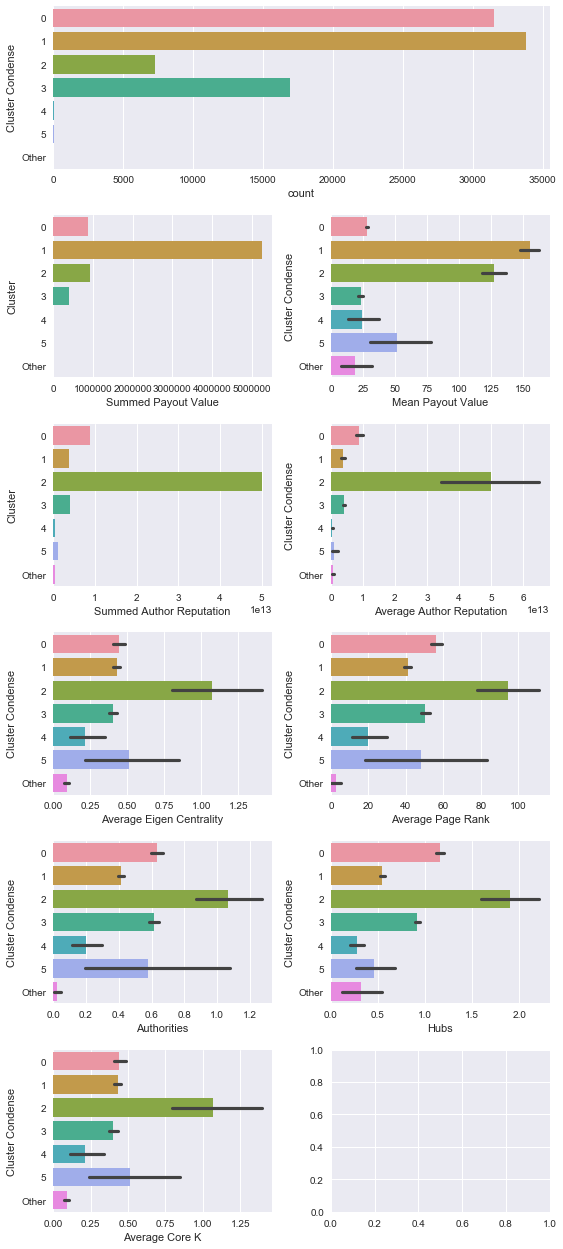

In [8]:
fig,axs = plt.subplots(2,2,figsize = (8,20))

ax1 = plt.subplot2grid((7,4), (0,0), colspan=4)
ax2 = plt.subplot2grid((7,4), (1,0), colspan=2)
ax3 = plt.subplot2grid((7,4), (1, 2), colspan=2)
ax4 = plt.subplot2grid((7,4), (2, 0), colspan=2)
ax5 = plt.subplot2grid((7,4), (2, 2), colspan=2)
ax6 = plt.subplot2grid((7,4), (3, 0), colspan=2)
ax7 = plt.subplot2grid((7,4), (3, 2), colspan=2)
ax8 = plt.subplot2grid((7,4), (4, 0), colspan=2)
ax9 = plt.subplot2grid((7,4), (4, 2), colspan=2)
ax10 = plt.subplot2grid((7,4), (5, 0), colspan=2)
ax11 = plt.subplot2grid((7,4), (5, 2), colspan=2)




ax_it =iter([ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11])

alpha = 0.4
ax = ax_it.next()
order = np.sort(raw_posts['Cluster Condense'].unique())
sns.countplot(y = 'Cluster Condense',data=raw_posts,order=order,ax=ax)


ax = ax_it.next()


sns.barplot(y = 'Cluster',
            x = 'Summed Payout Value',
            ax = ax,
            data=posts_cluster_sum)
ax.set_xlabel('Summed Payout Value')


ax = ax_it.next()
sns.barplot(y = 'Cluster Condense',x = 'total_payout_value',ax = ax,order=order,
            data=raw_posts)
ax.set_xlabel('Mean Payout Value')



ax = ax_it.next()
sns.barplot(y = 'Cluster',
            x = 'Summed Author Reputation',order=order,
            ax = ax,
            data=posts_cluster_author_sum)
ax.set_xlabel('Summed Author Reputation')
ax = ax_it.next()
sns.barplot(y = 'Cluster Condense',
            x = 'reputation',
            ax = ax,order=order,
            data=authors)
ax.set_xlabel('Average Author Reputation')



ax = ax_it.next()
sns.barplot(y = 'Cluster Condense',
            x = 'Page Rank',
            ax = ax,order=order,
            data=authors)
ax.set_xlabel('Average Eigen Centrality')



ax = ax_it.next()
sns.barplot(y = 'Cluster Condense',
            x = 'Eigen Centrality',
            ax = ax,order=order,
            data=authors)
ax.set_xlabel('Average Page Rank')

ax = ax_it.next()
sns.barplot(y = 'Cluster Condense',
            x = 'Authorities',
            ax = ax,order=order,
            data=authors)
ax.set_xlabel('Authorities')

ax = ax_it.next()
sns.barplot(y = 'Cluster Condense',
            x = 'Hubs',
            ax = ax,order=order,
            data=authors)
ax.set_xlabel('Hubs')

ax = ax_it.next()
sns.barplot(y = 'Cluster Condense',
            x = 'Core K',
            ax = ax,order=order,
            data=authors)
ax.set_xlabel('Average Core K')



plt.tight_layout()

# Relationships between Measurements


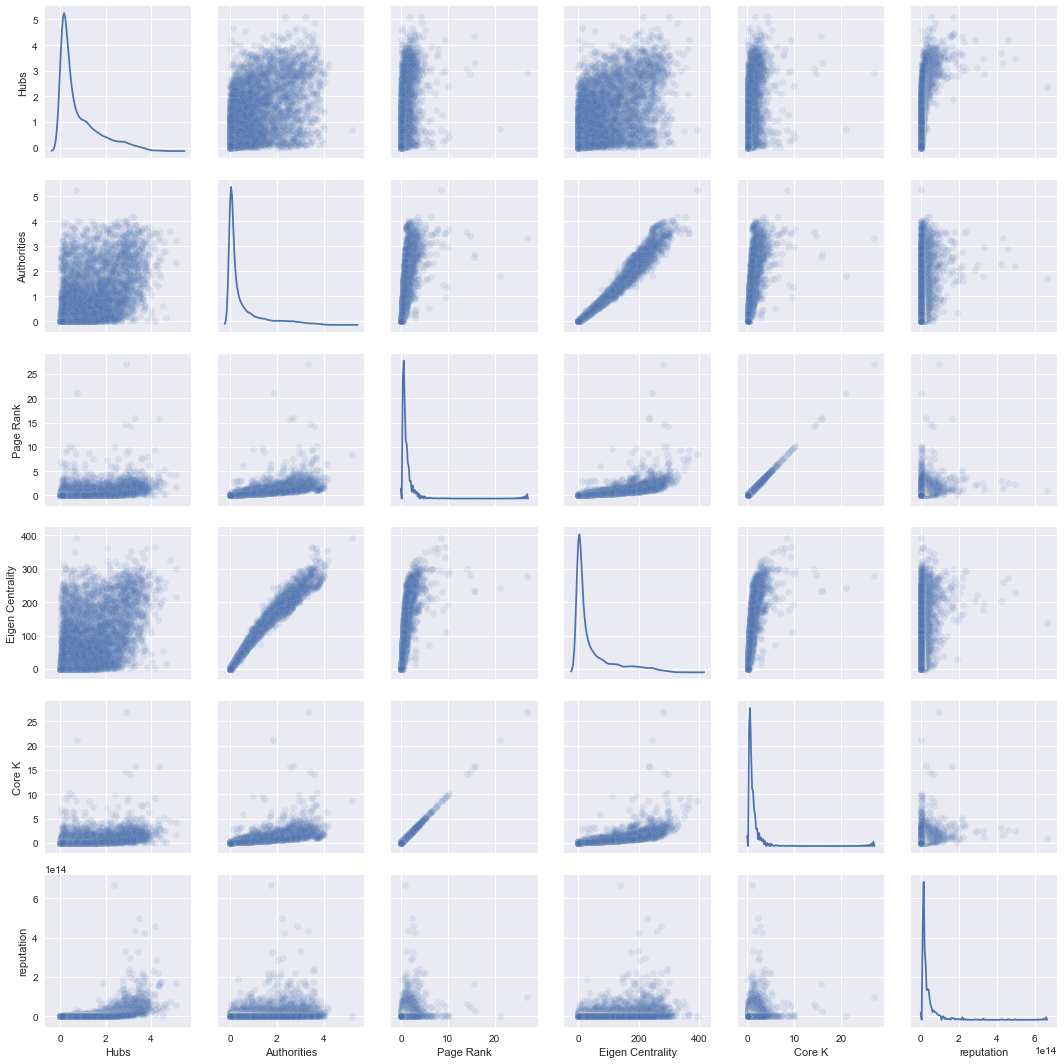

In [9]:
cols = ['Hubs','Authorities','Page Rank','Eigen Centrality','Core K','reputation']
sns.pairplot(authors,vars = cols,diag_kind="kde",plot_kws = {'alpha':0.1})

# Relationship between Measurements and Author Reputation

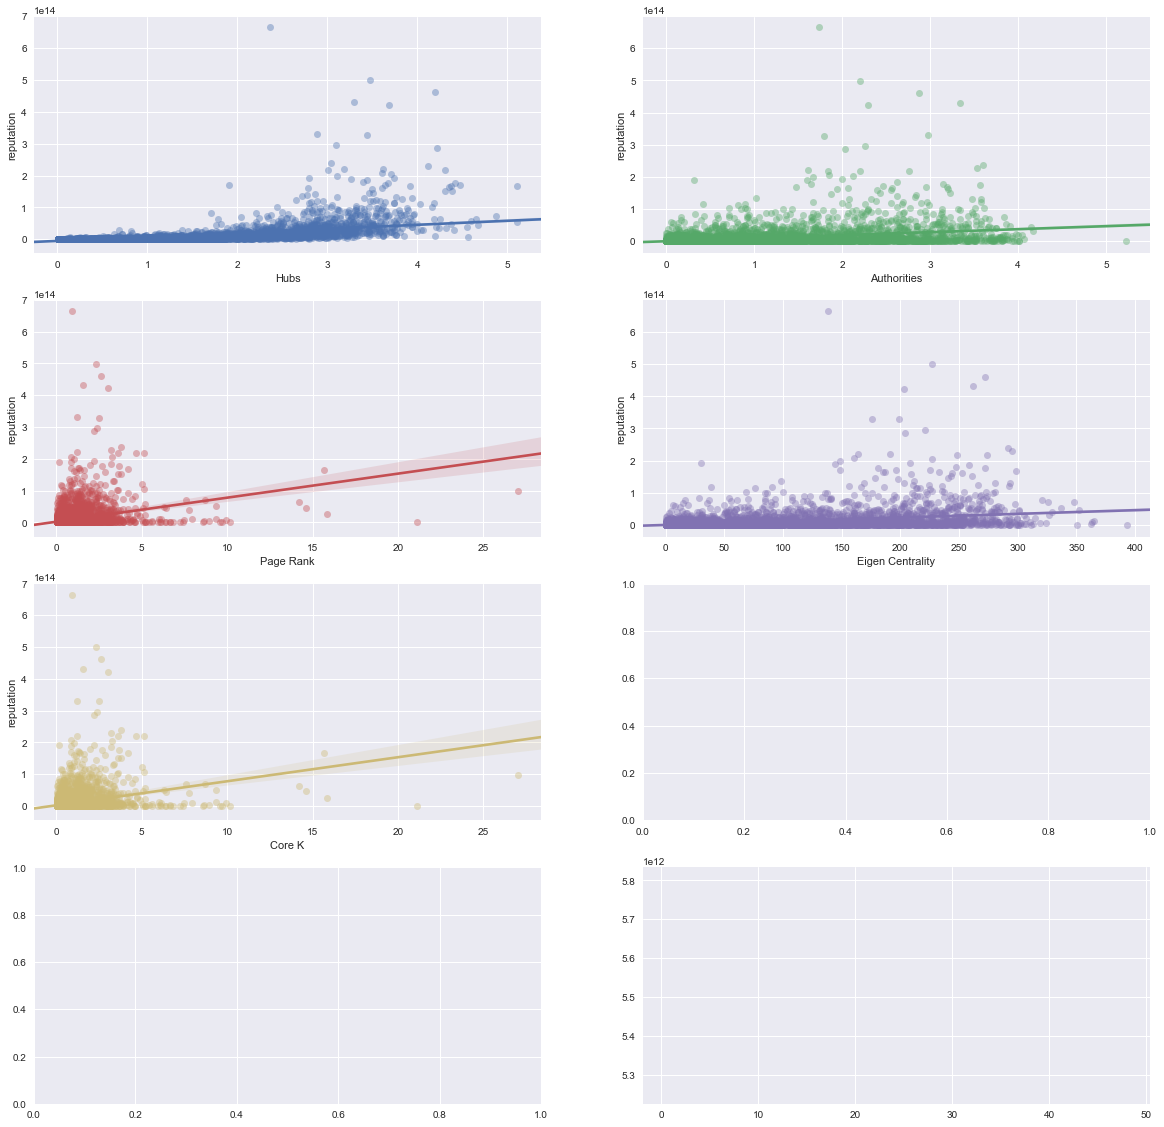

In [10]:
fig,axs = plt.subplots(4,2,figsize = (20,20))
ax_it =iter(axs.flatten())

alpha = 0.4

for col in ['Hubs','Authorities','Page Rank','Eigen Centrality','Core K']:
    ax = ax_it.next()
    sns.regplot(data=authors,x = col,y = 'reputation',ax = ax,scatter_kws={"alpha": alpha})


# Relationship between Measurements and Post Value

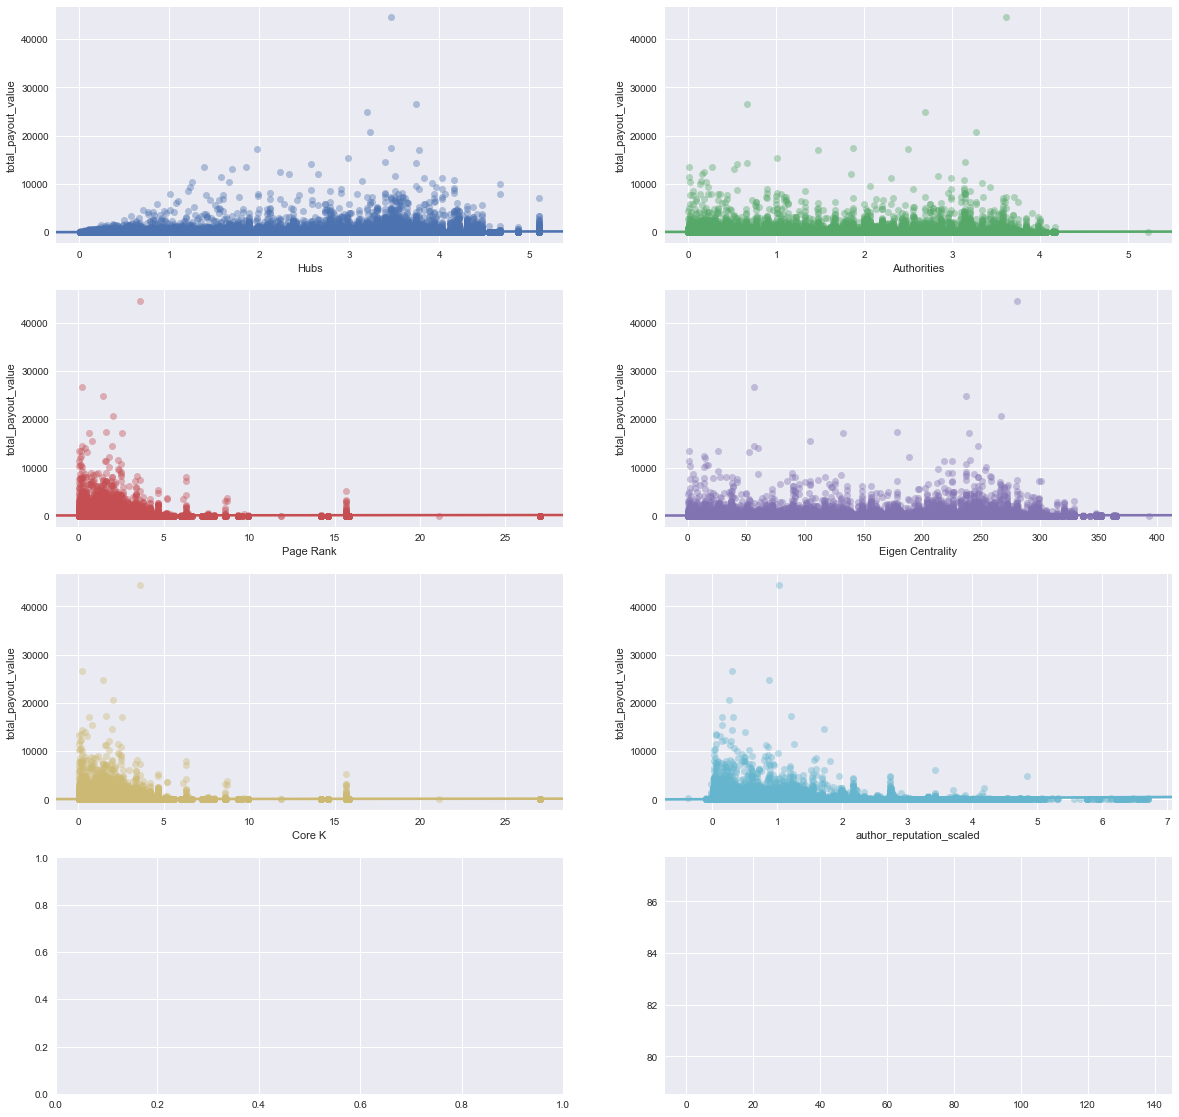

In [16]:
fig,axs = plt.subplots(4,2,figsize = (20,20))
ax_it =iter(axs.flatten())

alpha = 0.4

for col in ['Hubs','Authorities','Page Rank','Eigen Centrality','Core K','author_reputation_scaled']:
    ax = ax_it.next()
    sns.regplot(data=raw_posts,x = col,y = 'total_payout_value',ax = ax,scatter_kws={"alpha": alpha})


In [ ]:
raw_posts.groupby('author')

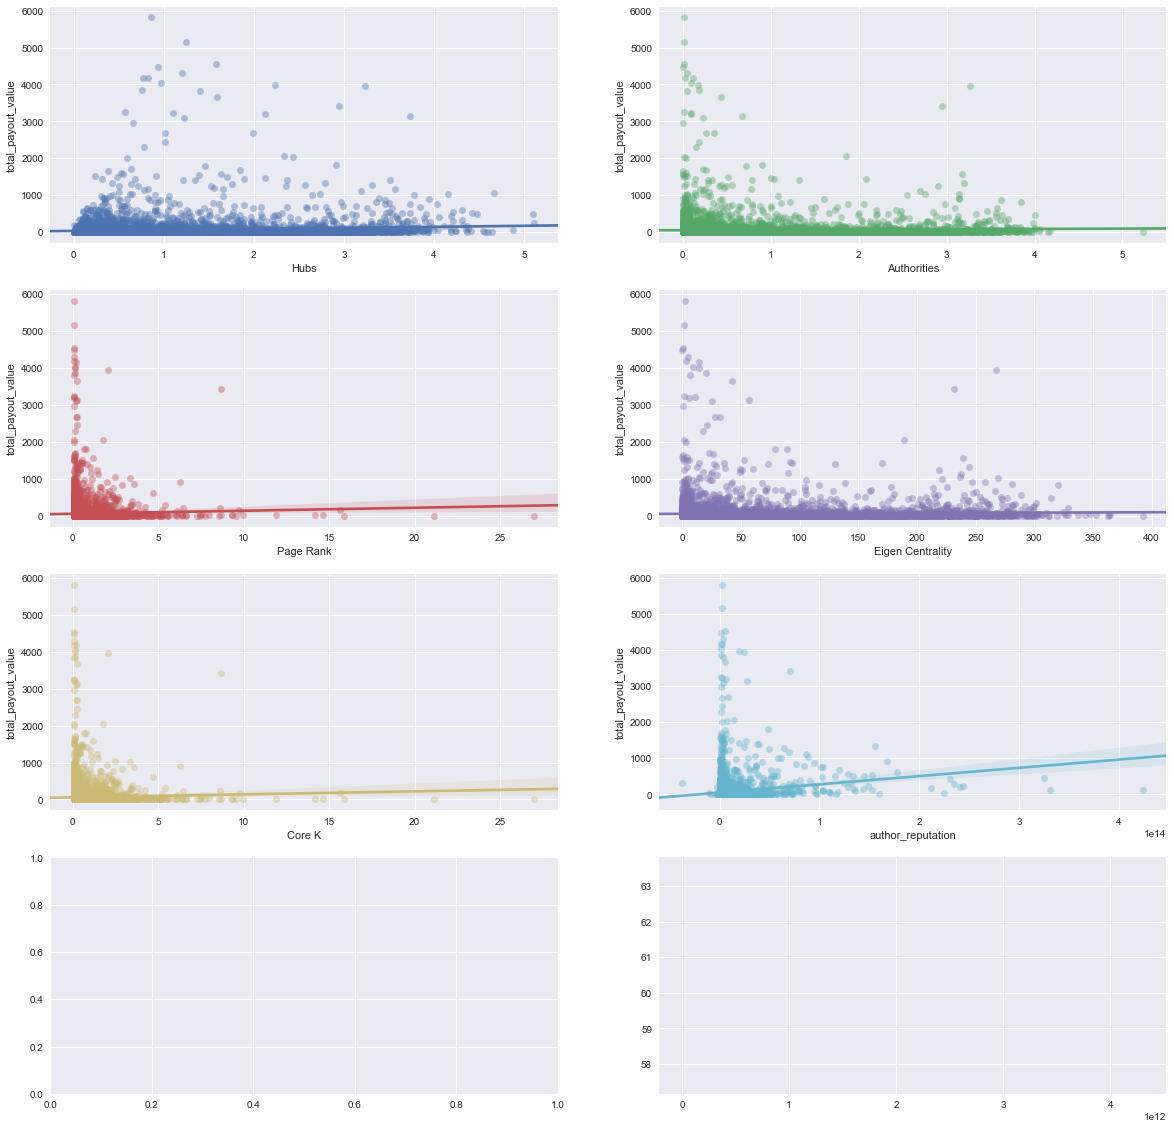

In [17]:
fig,axs = plt.subplots(4,2,figsize = (20,20))
ax_it =iter(axs.flatten())

alpha = 0.4

for col in ['Hubs','Authorities','Page Rank','Eigen Centrality','Core K','author_reputation']:
    ax = ax_it.next()
    sns.regplot(data=posts_author_mean,x = col,y = 'total_payout_value',ax = ax,scatter_kws={"alpha": alpha})



In [27]:
posts_author_mean_cluster

,Cluster Condense,ID,depth,children,children_rshares2,net_rshares,abs_rshares,vote_rshares,children_abs_rshares,total_vote_weight,...,body whale mentions,author_reputation_scaled,author centrality,cluster,Cluster,Hubs,Authorities,Page Rank,Eigen Centrality,Core K
0,0,1.221653e+06,0.0,7.678727,5.876563e+24,2.254199e+11,2.518931e+11,2.396994e+11,2.932426e+11,0.0,...,2.087308,0.317028,0.017555,7.030413,0.0000,2.610477,1.499029,1.263981,132.212049,1.263981
1,1,5.831137e+05,0.0,12.028344,4.086349e+24,9.108292e+10,1.366785e+11,1.275985e+11,1.654212e+11,0.0,...,1.588568,0.328084,0.023939,5.914046,1.0000,2.149884,1.315152,1.300994,124.713744,1.300994
2,2,1.179846e+06,0.0,18.509283,1.830285e+25,4.883699e+11,5.320685e+11,5.146554e+11,7.767630e+11,0.0,...,4.457846,1.235582,0.046020,6.674534,2.0000,3.785092,2.326775,2.928786,210.140016,2.928786
3,3,1.405876e+06,0.0,7.839277,9.119765e+24,3.444687e+11,3.683986e+11,3.571245e+11,4.044116e+11,0.0,...,2.141710,0.146468,0.015329,6.348026,3.0000,2.216870,1.830205,1.345995,146.290422,1.345995
4,4,8.300697e+05,0.0,5.520000,0.000000e+00,-1.467557e+11,1.002255e+11,0.000000e+00,3.947895e+11,0.0,...,0.200000,0.004758,0.007476,4.650000,4.0000,0.343599,0.164219,0.138018,16.871810,0.138018
5,5,5.483308e+05,0.0,9.058140,2.882319e+20,7.049004e+07,7.195232e+07,7.195232e+07,7.195232e+07,0.0,...,0.372093,0.056609,0.016772,6.442623,5.0000,1.180249,1.515420,1.301555,136.335236,1.301555
6,Other,5.583987e+05,0.0,61.062500,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,...,0.000000,0.004397,0.006086,0.000000,59.5625,0.276754,0.022811,0.091223,2.865548,0.091223


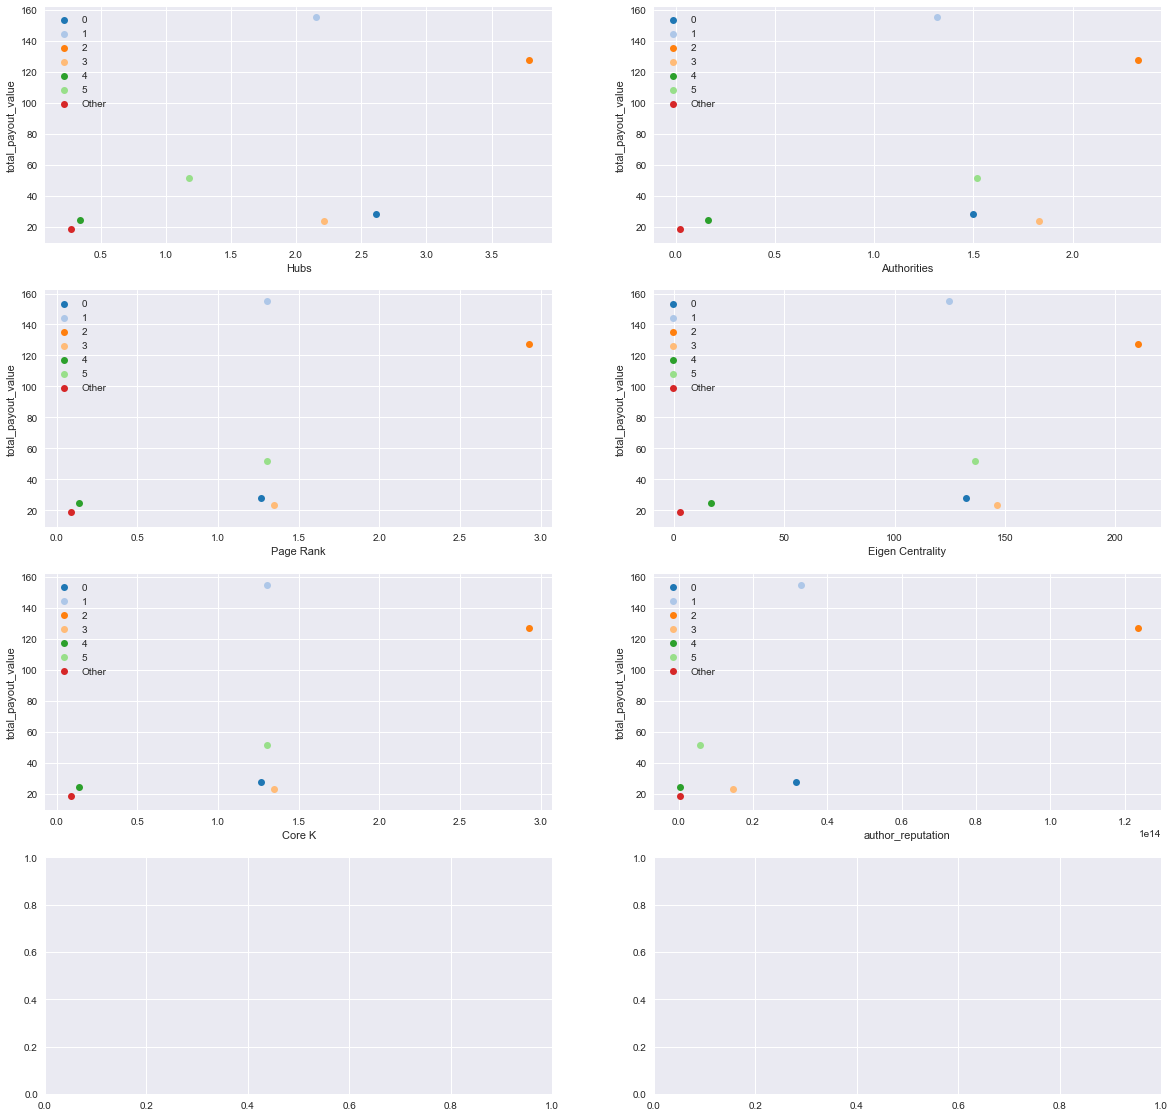

In [34]:
fig,axs = plt.subplots(4,2,figsize = (20,20))
ax_it =iter(axs.flatten())
mcmap = plt.cm.get_cmap('Vega20')


alpha = 1

posts_author_mean_cluster = raw_posts.groupby(['Cluster Condense']).mean().reset_index()


def regplot_hue(data,x,y,hue,ax):
    for i,hue_value in enumerate(np.sort(data[hue].unique())):
        color = mcmap(i)
        idx = data[hue] == hue_value
        df_plot = data[idx]
        sns.regplot(data=df_plot,
                    x = x,
                    y = y,
                    ax = ax,
                    scatter_kws={"alpha": alpha},fit_reg = False,
                    label=str(hue_value), color = color)


for col in ['Hubs','Authorities','Page Rank','Eigen Centrality','Core K','author_reputation']:
    ax = ax_it.next()
    regplot_hue(data=posts_author_mean_cluster,x = col,y = 'total_payout_value',ax = ax,hue = 'Cluster Condense')
    ax.legend()


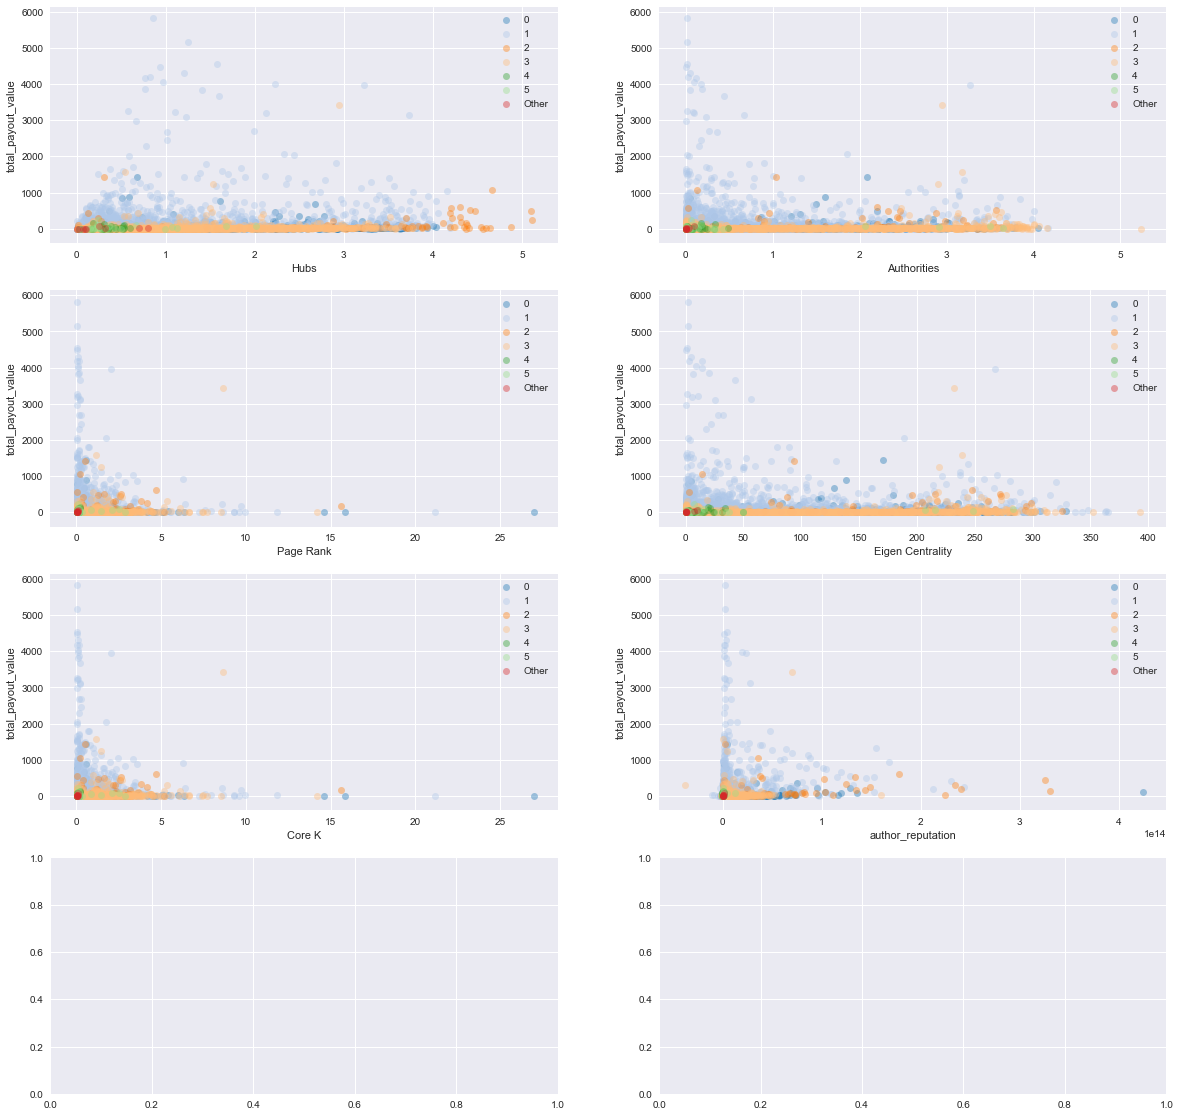

In [35]:
fig,axs = plt.subplots(4,2,figsize = (20,20))
ax_it =iter(axs.flatten())
mcmap = plt.cm.get_cmap('Vega20')


alpha = 0.4

posts_author_mean_cluster = raw_posts.groupby(['Cluster Condense','author']).mean().reset_index()


def regplot_hue(data,x,y,hue,ax):
    for i,hue_value in enumerate(np.sort(data[hue].unique())):
        color = mcmap(i)
        idx = data[hue] == hue_value
        df_plot = data[idx]
        sns.regplot(data=df_plot,
                    x = x,
                    y = y,
                    ax = ax,
                    scatter_kws={"alpha": alpha},fit_reg = False,
                    label=str(hue_value), color = color)


for col in ['Hubs','Authorities','Page Rank','Eigen Centrality','Core K','author_reputation']:
    ax = ax_it.next()
    regplot_hue(data=posts_author_mean_cluster,x = col,y = 'total_payout_value',ax = ax,hue = 'Cluster Condense')
    ax.legend(loc = 'best')
    


In [15]:
posts_author_mean.head()

,ID,depth,children,children_rshares2,net_rshares,abs_rshares,vote_rshares,children_abs_rshares,total_vote_weight,reward_weight,...,body whale mentions,author_reputation_scaled,author centrality,cluster,Cluster,Hubs,Authorities,Page Rank,Eigen Centrality,Core K
author,,,,,,,,,,,,,,,,,,,,,
a-condor,1.719920e+06,0.0,2.666667,3.413720e+21,8.532291e+08,8.532291e+08,8.532291e+08,8.532291e+08,0.0,10000.0,...,0.000000,0.020628,0.007361,6.0,3.0,1.478239,0.040998,0.063345,3.478683,0.063345
a11at,5.542568e+05,0.0,3.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,7939.5,...,0.000000,-0.009806,NaN,NaN,1.0,0.308822,0.294554,0.215894,27.493508,0.215894
aaanderson,1.471295e+06,0.0,3.666667,1.104431e+22,2.756574e+09,2.756574e+09,2.756574e+09,2.756574e+09,0.0,10000.0,...,6.666667,0.035330,0.014309,4.0,3.0,1.296434,0.214367,0.163030,20.255657,0.163030
aarauz,1.753467e+06,0.0,5.210526,1.469271e+24,2.977087e+11,2.977087e+11,2.977087e+11,2.977642e+11,0.0,10000.0,...,0.000000,0.079272,0.008329,14.0,3.0,1.522379,0.887182,0.360161,79.361879,0.360161
aaravednit,4.879445e+05,0.0,5.500000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,10000.0,...,0.000000,0.006194,NaN,NaN,1.0,0.395063,0.010491,0.058142,0.859979,0.058142


## Cluster Exploration

In [176]:
# fig,axs = plt.subplots(3,2,figsize = (20,20))
# ax_it =iter(axs.flatten())

# def regplot_hue(data,x,y,hue,ax):
#     for i,hue_value in enumerate(np.sort(data[hue].unique())):
#         color = mcmap(i)
#         idx = data[hue] == hue_value
#         df_plot = data[idx]
#         sns.regplot(data=df_plot,x = x,y = y,ax = ax,scatter_kws={"alpha": alpha},label=str(i), color = color)


# alpha = 0.4
# ax = ax_it.next()
# # sns.regplot(data=authors,x = 'Hubs',y = 'Authorities',ax = ax,scatter_kws={"alpha": alpha})
# regplot_hue(data=authors,x = 'Hubs',y = 'Authorities',ax = ax,hue = 'Cluster Condense')
# ax.legend(loc= 'best')

# ax = ax_it.next()
# regplot_hue(data=authors,x = 'Page Rank',y = 'Eigen Centrality',ax = ax,hue = 'Cluster Condense')
# ax.legend(loc= 'best')

# ax = ax_it.next()
# regplot_hue(data=authors,x = 'Hubs',y = 'Page Rank',ax = ax,hue = 'Cluster Condense')
# ax.legend(loc= 'best')

# ax = ax_it.next()
# regplot_hue(data=authors,x = 'Hubs',y = 'Eigen Centrality',ax = ax,hue = 'Cluster Condense')
# ax.legend(loc= 'best')

# ax = ax_it.next()
# regplot_hue(data=authors,x = 'Authorities',y = 'Page Rank',ax = ax,hue = 'Cluster Condense')

# ax.legend(loc= 'best')


# ax = ax_it.next()
# regplot_hue(data=authors,x = 'Authorities',y = 'Eigen Centrality',ax = ax,hue = 'Cluster Condense')
# ax.legend(loc= 'best')


